In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from tqdm import tqdm

In [71]:
l = 0.1

ms = np.arange(2, 9)
pi_est = np.zeros_like(ms, dtype=float)
pi_est_err = np.zeros_like(ms, dtype=float)

measure_num = 100
Nb = 10000000

for i, m in enumerate(ms):
    
    m_data = np.zeros(measure_num)
    
    for j in tqdm(range(measure_num)):
        
        n = 10 ** m
        poss = np.random.rand(n) * 0.5
        
        # sample uniform theta
        
        thetas = np.random.rand(n) * np.pi / 2

        # calculate cos values
        
        coss = np.cos(thetas)
        
        #calculate the left point of bars
        
        left = poss - coss * 0.5 * l
        
        count = np.sum((left < 0))
        rat = count / len(left)
        
        m_data[j] = 2.0 * l / rat

    
    # use bootstrap resampling

    x_bar = np.mean(m_data)
    rB = np.random.choice(m_data, (measure_num, Nb))
    xB = np.mean(rB, axis = 0)
    xB_bar = np.mean(xB)

    pi_est[i] = 2*x_bar - xB_bar
    pi_est_err[i] = np.std(xB) * np.sqrt(measure_num / (measure_num - 1))

100%|█████████████████████████████████████████| 100/100 [03:35<00:00,  2.16s/it]


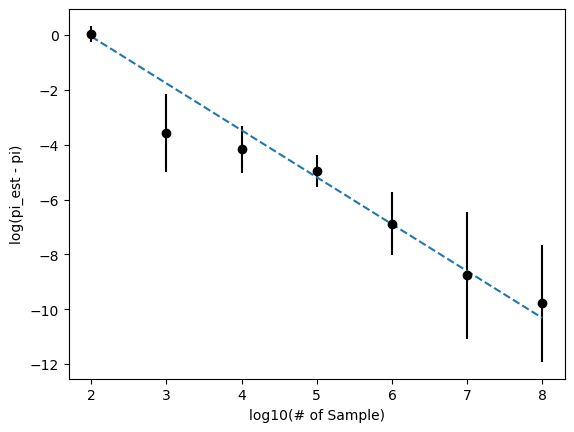

chi^2 / DOF : 0.6820029573714789


In [109]:
func = lambda x, a0, a1 : a0 + a1 * x

pis_true = np.full(len(ms), np.pi)

plot_ys = np.log(np.abs(pi_est - pis_true))
plot_yerrs = pi_est_err / np.abs(pi_est-np.pi)

popt, pcov = curve_fit(func, ms, plot_ys, sigma = plot_yerrs, absolute_sigma = True)
a0opt, a1opt = popt
perr = np.sqrt(np.diag(pcov))



plt.errorbar(ms, plot_ys, yerr = plot_yerrs, fmt = 'ko')
plt.plot(ms, func(ms, a0opt, a1opt), linestyle='--')
plt.xlabel('log10(# of Sample)')
plt.ylabel('log(pi_est - pi)')

plt.savefig("2")
plt.show()

print(f"chi^2 / DOF : {np.sum((plot_ys - func(ms, a0opt, a1opt))**2) / (len(ms) - 1)}")

In [102]:
for i, pi in enumerate(pi_est):
    print(f"{pi_est[i]} +/- {pi_est_err[i]}")

4.17400789465812 +/- 0.3073432983024348
3.1699059186660254 +/- 0.040152622851650006
3.156959760941199 +/- 0.013375439960737713
3.148670849865311 +/- 0.004073610075968113
3.1405689956202076 +/- 0.0011832205470833188
3.1414368714320666 +/- 0.0003618494815098399
3.1416489922099666 +/- 0.00012038462569818556


In [107]:
for i, a in enumerate(popt):
    print(f"{popt[i]} +/- {perr[i]}")

3.363238913457698 +/- 0.5339177049078878
-1.7101332664839055 +/- 0.1583986609168152
